In [2]:
import pandas as pd
import numpy as np
url = r"C:\Users\user\Documents\Python Scripts\Exercise_data\bank_data.csv"
bank = pd.read_csv(url)

In [ ]:
#This dataset is based on "Bank Marketing" . The goal of this problem is to build a predictive model
#to predict whether a bank customer will subscribe to a term deposit or not. 

In [3]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [5]:
bank.shape

(41188, 21)

In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
bank['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [8]:
#find the missing data
bank.isna().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [9]:
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

# FILL THE MISSING DATA USING FILLNA

In [10]:
bank['job'].fillna(bank['job'].value_counts().index[0],inplace = True)

In [11]:
bank['default'].fillna(bank['default'].value_counts().index[0],inplace = True)

In [12]:
bank['marital'].fillna(bank['marital'].value_counts().index[0],inplace = True)

In [13]:
bank['education'].fillna(bank['education'].value_counts().index[0],inplace = True)

In [14]:
bank['housing'].fillna(bank['housing'].value_counts().index[0],inplace = True)

In [15]:
bank['loan'].fillna(bank['loan'].value_counts().index[0],inplace = True)

In [16]:
#After filling the missing data using the fillna method, we check the missing data again
bank.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Using Label Encoder to convert categorical data(Y) to binary form

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
l3 = LabelEncoder()
Label = l3.fit_transform(bank["y"])

In [19]:
l3.classes_

array(['no', 'yes'], dtype=object)

In [20]:
Label

array([0, 0, 0, ..., 0, 1, 0])

In [21]:
new_bank = bank.drop('y', axis = 'columns')

In [22]:
new_bank['y'] = Label

In [23]:
new_bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [24]:
#the clients that subscribed to a term deposit
new_bank['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [25]:
#the no of clients that has credit in default
new_bank['default'].value_counts()

no     41185
yes        3
Name: default, dtype: int64

In [26]:
#outcome of the previous marketing campaign
new_bank['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

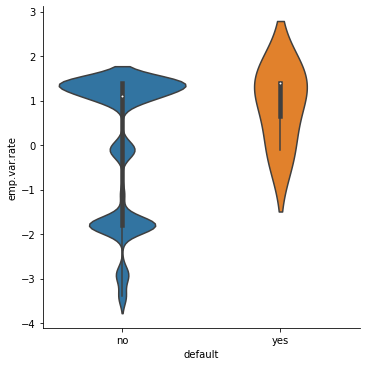

In [28]:
sns.catplot(data=bank,x='default',y='emp.var.rate',kind='violin')
plt.show()

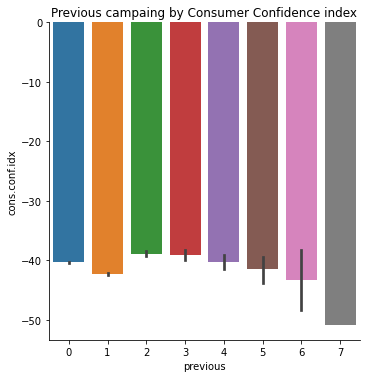

In [53]:
sns.catplot(data=bank,x='previous',y='cons.conf.idx',kind='bar')
plt.title('Previous campaing by Consumer Confidence index')
plt.show()

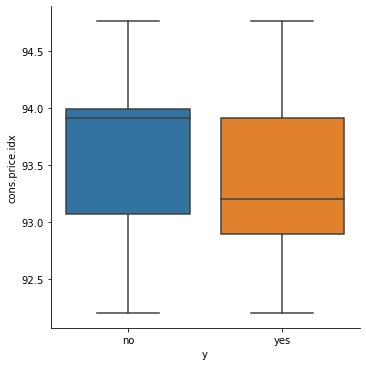

In [35]:
sns.catplot(data=bank,x='y',y='cons.price.idx',kind='box')
plt.show()

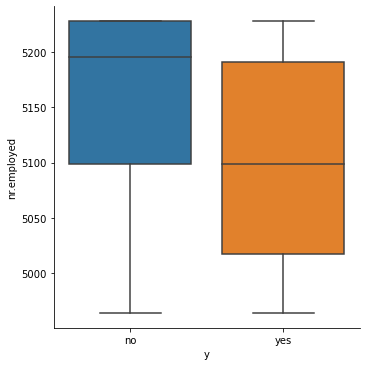

In [36]:
sns.catplot(data=bank,x='y',y='nr.employed',kind='box')
plt.show()

<AxesSubplot:title={'center':'nr.employed'}, xlabel='y'>

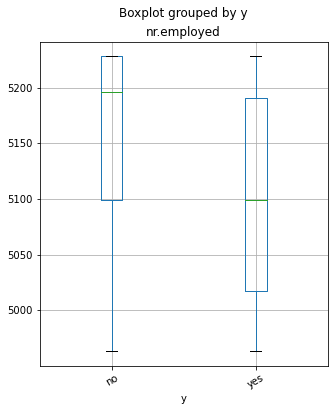

In [37]:
bank.boxplot('nr.employed','y',rot=30, figsize=(5,6))

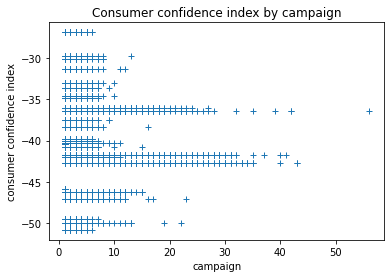

In [38]:
plt.plot(bank['campaign'], bank['cons.conf.idx'], '+')
plt.xlabel('campaign')
plt.ylabel('consumer confidence index')
plt.title('Consumer confidence index by campaign')
plt.show()

In [41]:
features = new_bank.drop(["y","age","job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome"], axis = 1).values
target = new_bank['y']

In [42]:
new_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [43]:
#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0)

In [44]:
#standardize the data
from sklearn.preprocessing import StandardScaler
#instantiate the scalar
Scaler = StandardScaler()

In [45]:
#scale the data
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)

In [46]:
#train the data
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [47]:
#check performance of the model
print("Train Accuracy:{:.4f}".format(lr.score(X_train_scaled, y_train)))
print("Test Accuracy:{:.4f}".format(lr.score(X_test_scaled, y_test)))

Train Accuracy:0.3203
Test Accuracy:0.3308


In [ ]:
#Perform Ridge Regression

In [48]:
from sklearn.linear_model import Ridge

# instantiate the model
ridge = Ridge(random_state=0)

# fit the model
ridge.fit(X_train_scaled, y_train)

# training and test accuracy

print(ridge.score(X_train_scaled, y_train))
print(ridge.score(X_test_scaled, y_test))

0.3202894385888112
0.330810026759232


In [ ]:
#LAsso Regression

In [49]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.01)
#train the lasso model
lasso.fit(X_train_scaled, y_train)
#get the accuracy on both data sets
print(lasso.score(X_train_scaled, y_train))
print(lasso.score(X_test_scaled, y_test))

0.31349670168324983
0.32474957313876296


# To check the number of features that lasso used

In [50]:
import numpy as np
np.sum(lasso.coef_!=0)

4

In [51]:
from sklearn.linear_model import LogisticRegression

# instantiate the algorithm
logreg=LogisticRegression() #Ajdusting the C argument mean hyperparameter tuning or regularization.

# fit the model
logreg.fit(X_train_scaled,y_train)

# check the accuracy
print(logreg.score(X_train_scaled,y_train))
print(logreg.score(X_test_scaled,y_test))

0.9084846719109125
0.9112362824123531


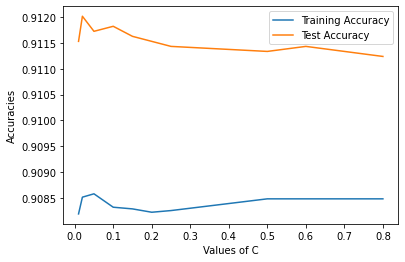

In [52]:
values_of_C = [0.01, 0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.5, 0.6, 0.8]

train_accuracy = []
test_accuracy = []

import matplotlib.pyplot as plt

for C in values_of_C:
    logreg = LogisticRegression(C = C, random_state = 0)
    logreg.fit(X_train_scaled, y_train)
    train_accuracy.append(logreg.score(X_train_scaled, y_train))
    test_accuracy.append(logreg.score(X_test_scaled, y_test))

plt.plot(values_of_C, train_accuracy, label = "Training Accuracy")
plt.plot(values_of_C, test_accuracy, label = "Test Accuracy")
plt.legend()
plt.xlabel("Values of C")
plt.ylabel("Accuracies")
plt.show()

In [54]:
#Confusion Matrix and Classification report

from sklearn.metrics import confusion_matrix, classification_report

# make predictions on the test data
y_predict=logreg.predict(X_test_scaled)

# Compute the confusion matrix
conf=confusion_matrix(y_test,y_predict)

# display the confusion matrix
conf

array([[8917,  222],
       [ 692,  466]], dtype=int64)

In [55]:
#The result of the confusion matrix above shows that out of 9139 customers, the model predicted correctly that 8917 will not subscribe to the product and omitted 222 people.
#it also showed that 692 people subscribed and truly they did not subscribed while 466 people were estimated not to subscribe but truly they did.

In [56]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
print(f"Accuracy:{round(accuracy_score(y_test, y_predict), 2)}")
print(f"Precision:{round(precision_score(y_test, y_predict), 2)}")
print(f"Recall:{round(recall_score(y_test, y_predict), 2)}")
print(f"F1_score:{round(f1_score(y_test, y_predict), 2)}")

Accuracy:0.91
Precision:0.68
Recall:0.4
F1_score:0.5


In [57]:
# Classification Report
report=classification_report(y_test,y_predict)
print('classification report: \n{}'.format(report)) 

classification report: 
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      9139
           1       0.68      0.40      0.50      1158

    accuracy                           0.91     10297
   macro avg       0.80      0.69      0.73     10297
weighted avg       0.90      0.91      0.90     10297



In [58]:
#The classification report showed that the model has an accuracy of 91%. This means that it predicted very well that customers will not subscribe to the product.
#The precision for those who will not subscribe is 98%, Recall is 98% while F1-score is 95%
#Also, the precision for those that will subscribe is 68%, Recall is 40% and F1-score is 50%

In [59]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier(max_depth=3)

# train the model
dec_tree.fit(X_train, y_train)

# evaluate on the training and test set
print("Trainng Accuracy: {:.3f}".format(dec_tree.score(X_train, y_train)))
print("Test Accuracy: {:.3f}".format(dec_tree.score(X_test, y_test)))

Trainng Accuracy: 0.907
Test Accuracy: 0.911


In [60]:
dec_tree.feature_importances_

array([0.50240311, 0.        , 0.05366934, 0.        , 0.        ,
       0.        , 0.0405134 , 0.        , 0.40341415])

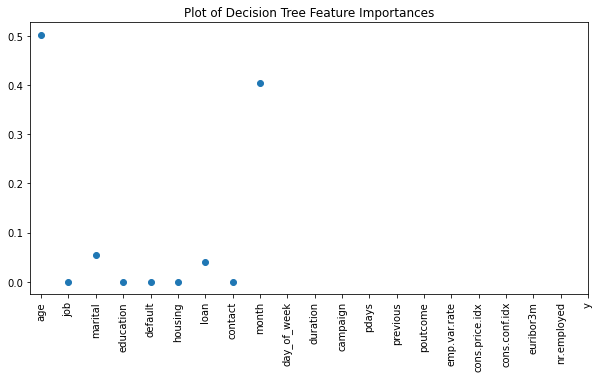

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 5))

plt.plot(dec_tree.feature_importances_, 'o')
plt.xticks(range(new_bank.shape[1]),new_bank.columns, rotation = 90)
plt.title("Plot of Decision Tree Feature Importances")
plt.show()

In [64]:
# import the Random Forest classifier with regularization
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier (we can use a max_depth of 3)
rf=RandomForestClassifier(max_depth=3)

# train the model
rf.fit(X_train,y_train) 

# performance scores
print("Trainng Accuracy: {:.4f}".format(rf.score(X_train, y_train)))
print("Test Accuracy: {:.4f}".format(rf.score(X_test, y_test)))

Trainng Accuracy: 0.9041
Test Accuracy: 0.9025


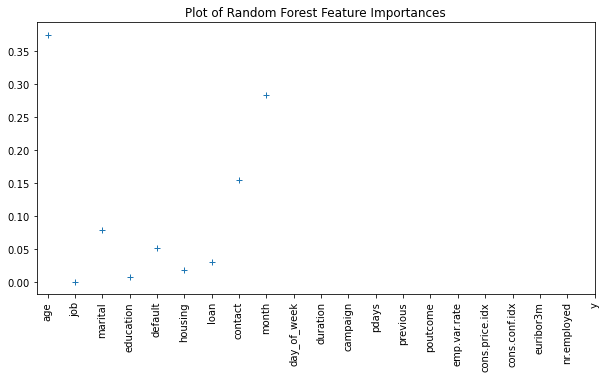

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 5))

plt.plot(rf.feature_importances_, '+')
plt.xticks(range(new_bank.shape[1]), new_bank.columns, rotation = 90)
plt.title("Plot of Random Forest Feature Importances")
plt.show()

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression 
new_bank = bank

new_bank.keys()

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [67]:
# instantiate the model

logreg = LogisticRegression(max_iter=1000)

scores = cross_val_score(logreg, X_train, y_train, cv = 5, n_jobs = -1)

print("Cross-validation scores: {}".format(scores.mean()))

Cross-validation scores: 0.9083875401446152


In [69]:
# standrdize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# scale the data
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# train the logistic regression model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C = 0.1)

logreg.fit(X_train_std, y_train)

# get the accuracy
print("Train accuracy: {}".format(logreg.score(X_train_std, y_train)))
print("Test accuracy: {}".format(logreg.score(X_test_std, y_test)))

Train accuracy: 0.9083228124696514
Test accuracy: 0.9118189764008935


In [71]:
from sklearn.model_selection import KFold

# instantiate it
kfold = KFold(n_splits=3)

# assign the kfold splitter to the cv parameter in the cross_val_score
scores = cross_val_score(logreg, X_test, y_test, cv = kfold)

print("KFold scores: {}".format(scores))

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

KFold scores: [0.90999126 0.91899767 0.90763403]


In [72]:
# another way to resolve the issue of standard KFold is to set the shuffle parameter to True
kfold = KFold(n_splits = 3, shuffle=True, random_state = 0)

scores = cross_val_score(logreg, X_test, y_test, cv = kfold)

print("KFold scores with shuffle: {}".format(scores))

KFold scores with shuffle: [0.92047772 0.91083916 0.90705128]


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [74]:
#Manual Grid Search

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# split the data
X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, random_state = 0)

# loop through the combination values of both parameters
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10]:
    for C in [0.001, 0.01, 0.1, 1, 10]:
        svc = SVC(gamma = gamma, C = C, random_state = 0)
        svc.fit(X_train, y_train)
        score = svc.score(X_test, y_test)
        
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.9223300970873787
Best parameters: {'C': 1, 'gamma': 0.001}


In [75]:
# split the data into training+validation and test sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X_train, y_train, random_state = 1)

# split the training+validation into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, random_state = 1)
# loop through the combination values of both parameters
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10]:
    for C in [0.001, 0.01, 0.1, 1, 10]:
        svc = SVC(gamma = gamma, C = C, random_state = 0)
        svc.fit(X_train, y_train)
        score = svc.score(X_val, y_val)
        
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}


# train the model with the selected parameters on the combined data (training  + validation sets)
svc = SVC(**best_parameters)
svc.fit(X_trainval, y_trainval)

test_score = svc.score(X_test, y_test)

print("Best score on validation set: {}".format(best_score))
print("Best parameters: {}".format(best_parameters))
print("Best score on test set: {}".format(test_score))

Best score on validation set: 0.8970994475138122
Best parameters: {'C': 10, 'gamma': 0.001}
Best score on test set: 0.9078197824961161


In [76]:
#Implementing Grid Search

In [77]:
# import the grid search model and the estimator
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC

# set the parameters to tune
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
             'gamma': [0.001, 0.01, 0.1, 1, 10]}

# instantiate the models
svc = SVC()
grid = GridSearchCV(svc, param_grid, cv = 5, n_jobs = -1)


# we also need to split the data to avoid overfitting the parameters
X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, random_state = 0)

# fit the grid search model on the training set
grid.fit(X_train, y_train)

# get the performance score on the test set
print("Test score with GridSearch: {}".format(grid.score(X_test, y_test)))

print("Best parameters: {}".format(grid.best_params_))

Test score with GridSearch: 0.8985507246376812
Best parameters: {'C': 0.001, 'gamma': 0.001}
